In [1]:
import sys
import os

# Ajouter le dossier parent de 'src' au chemin Python
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)


In [2]:
import os
print (os.getcwd())

/home/bala/fraud-detection-project/notebooks


In [4]:
# Cellule 1 : Import et chargement
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('..')  # Pour importer depuis src

from src.data.data_loader import DataLoader

# Configuration
plt.style.use('default')  # Style par défaut
sns.set_palette("husl")
%matplotlib inline

print("🚀 Projet Détection de Fraude - Exploration des Données")


🚀 Projet Détection de Fraude - Exploration des Données


In [5]:
# Cellule 2 - Chargement des données
loader = DataLoader()
df = loader.load_raw_data()

print(f"📊 Dimensions du dataset: {df.shape}")
print(f"🎯 Nombre de fraudes: {df['Class'].sum()}")
print(f"📈 Taux de fraude: {df['Class'].sum()/len(df)*100:.4f}%")

# Aperçu des données
df.head()

 Création de données simulées...
Données simulées créées: 170 fraudes sur 100000 transactions
📊 Dimensions du dataset: (100000, 31)
🎯 Nombre de fraudes: 170
📈 Taux de fraude: 0.1700%


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Time,Amount,Class
0,0.720236,1.442832,2.108485,-1.819768,3.794282,-1.275630,2.100171,-0.305526,0.710235,2.613356,...,-0.994776,0.103128,0.338531,-0.000410,-0.092927,-0.020229,0.085319,0,23.997623,0
1,-0.200483,-1.617497,-0.127208,0.712170,-0.185123,-0.984302,-0.126723,0.177081,0.545737,0.168215,...,0.492445,-0.356266,-0.010165,0.050061,0.210964,-0.088348,0.066203,1,138.042750,0
2,0.939148,0.805612,-1.794873,-0.156991,-2.164697,0.819876,-0.836445,0.119371,0.527702,-1.798394,...,-0.209286,-0.305499,0.191414,0.173597,0.063501,-0.153913,-0.010488,2,144.974559,0
3,2.208393,-0.866934,-1.874661,-0.368243,0.643799,0.501479,-0.414773,0.583976,-0.196484,-0.104000,...,-0.715817,-0.219432,-0.487589,0.344995,-0.092026,0.134762,0.095018,3,75.738643,0
4,-0.339522,-0.458364,-0.462579,0.997840,-0.079676,0.506950,1.655667,0.009137,0.356630,0.624774,...,-0.134269,0.424063,0.394515,-0.067506,-0.036409,0.066197,0.057528,4,140.204868,0


In [6]:
# Cellule 3 - Analyse descriptive
print("📋 Statistiques descriptives:")
print(df.describe())

print("\n🔍 Valeurs manquantes:")
print(df.isnull().sum())

📋 Statistiques descriptives:
                  V1             V2             V3             V4  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.003524       0.004474       0.000755       0.001940   
std         1.451856       1.399423       1.350964       1.302952   
min        -6.475126      -6.123660      -5.958746      -5.606865   
25%        -0.976139      -0.940611      -0.908783      -0.881533   
50%         0.006154       0.004332      -0.001590       0.005379   
75%         0.984456       0.947725       0.911390       0.877205   
max         6.494672       6.386961       5.696145       5.093641   

                  V5             V6             V7             V8  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       -0.004946      -0.000558       0.006013       0.004757   
std         1.252559       1.203597       1.149718       1.102153   
min        -6.036795      -5.072678      -4.967385      -4.556672   
25% 

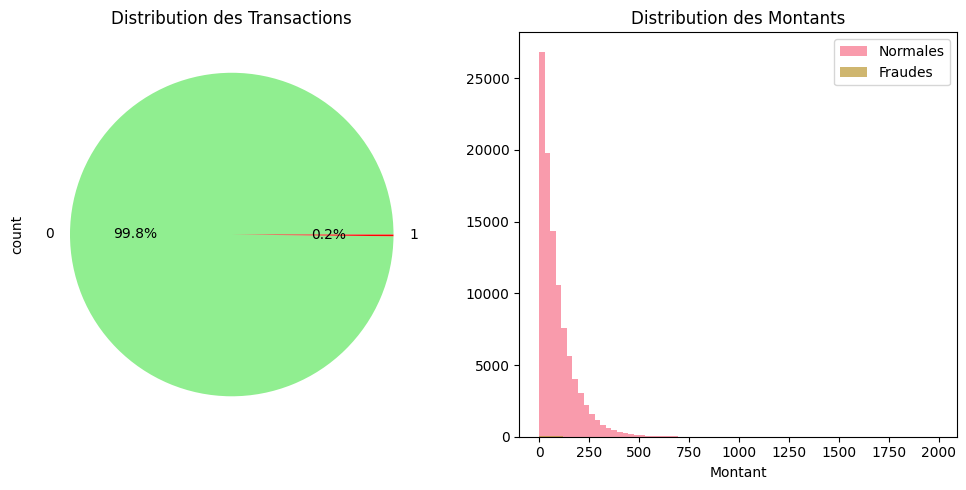

In [25]:
# Cellule 4 - Visualisation de la distribution des classes
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
df['Class'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'red'])
plt.title('Distribution des Transactions')

plt.subplot(1, 3, 2)
# Distribution des montants pour les fraudes vs normales
plt.hist(df[df['Class']==0]['Amount'], alpha=0.7, label='Normales', bins=50)
plt.hist(df[df['Class']==1]['Amount'], alpha=0.7, label='Fraudes', bins=50)
plt.legend()
plt.title('Distribution des Montants')
plt.xlabel('Montant')



plt.tight_layout()
plt.show()

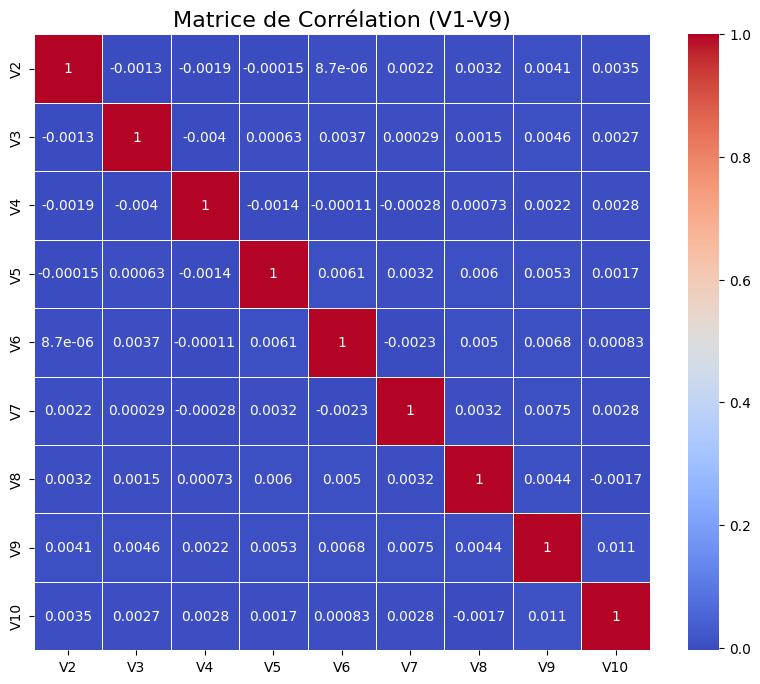

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))  # Taille plus grande pour la heatmap

corr_matrix = df.iloc[:, 1:10].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, linewidths=0.5)

plt.title('Matrice de Corrélation (V1-V9)', fontsize=16)
plt.show()
